In [1]:
import numpy as np
from keras.preprocessing import image
from keras.models import model_from_json
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
from masking import draw_mask

Using CNTK backend


In [2]:
# Define IoU metric and loss
def dice_coef(y_true, y_pred, smooth=1.):
    y_true_f = K.batch_flatten(y_true)
    y_pred_f = K.batch_flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [3]:
# Loading model
json_file = open("Models/UNetModel.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("Models/UNetModel.h5")
model.compile('adam', dice_loss, [dice_coef])

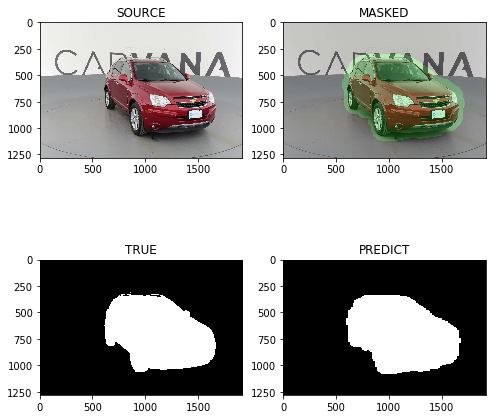

In [4]:
DIM = (128, 128, 3)
img = image.load_img('DATA/Stored/train/03a857ce842d_16.jpg')
mask = image.load_img('DATA/Stored/train_masks/03a857ce842d_16_mask.jpg', color_mode = "grayscale")
pred = image.array_to_img(model.predict(np.expand_dims(image.img_to_array(img.resize(DIM[:2])), axis=0))[0])
masked = draw_mask(image.img_to_array(img), image.img_to_array(pred), sens=1)

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.title('SOURCE')
plt.imshow(img)
plt.subplot(222)
plt.title('MASKED')
plt.imshow(masked)
plt.subplot(223)
plt.title('TRUE')
plt.imshow(mask)
plt.subplot(224)
plt.title('PREDICT')
plt.imshow(pred.resize(mask.size))
plt.show()